# Exploração dos dados de acesso ao Instituto

In [1]:
#importação bibliotecas e pacotes

import pandas as pd
import numpy as np
import statistics

import seaborn as sns
import matplotlib.pyplot as plt

# Analise e normalização dos dados

In [21]:
df = pd.read_excel('dataset_acesso_instituto.xlsx')
df.head()

,NR_FICHA,TP_ATENDIMENTO,NR_CONTROLE,CD_PESSOA,DT_ENTRADA,HR_ENTRADA,DS_TURNO,DS_DIA_SEMANA,DT_SAIDA,HR_SAIDA,IE_SEXO,QT_IDADE_ANOS,DS_TIPO,DS_SETOR,NM_PAIS,SG_ESTADO,DS_MUNICIPIO,NR_SEQ_COR_PELE
0,10445229.0,Autoatendimento,20000164,1522000,03/01/2022,06:24:38,Manhã,segunda-feira,03/01/2022,11:45:24,F,50,Acompanhante,Serviços Especiais,NaN,NaN,NaN,1.0
1,10445232.0,Autoatendimento,20000166,1573724,03/01/2022,06:25:35,Manhã,segunda-feira,03/01/2022,13:54:10,F,62,Acompanhante,Serviços Especiais,NaN,NaN,NaN,12.0
2,10445246.0,Autoatendimento,20000168,1472491,03/01/2022,06:26:34,Manhã,segunda-feira,03/01/2022,23:59:59,F,37,Acompanhante,Serviços Especiais,NaN,NaN,NaN,NaN
3,10445812.0,Outros,41143667,1547149,03/01/2022,08:12:09,Manhã,segunda-feira,03/01/2022,10:34:48,NaN,50,Acompanhante,Serviços Especiais,NaN,NaN,NaN,NaN
4,10445888.0,Outros,41143889,1582486,03/01/2022,08:24:04,Manhã,segunda-feira,03/01/2022,23:59:59,F,34,Acompanhante,Serviços Especiais,NaN,NaN,NaN,NaN


In [22]:
df.shape

(871995, 18)

In [26]:
#extraindo o mês da data
df['MES'] = pd.DatetimeIndex(df['DT_ENTRADA']).month

In [27]:
#alterando valor coluna mês para descritivo
ds_mes = []
for i in df['MES'].values:
    if i == 1:
        ds_mes.append('Janeiro')
    elif i == 2:
        ds_mes.append('Fevereiro')
    elif i == 3:
        ds_mes.append('Março')
    elif i == 4:
        ds_mes.append('Abril')
    elif i == 5:
        ds_mes.append('Maio')
    elif i == 6:
        ds_mes.append('Junho')
    elif i == 7:
        ds_mes.append('Julho')
    elif i == 8:
        ds_mes.append('Agosto')
    elif i == 9:
        ds_mes.append('Setembro')
    elif i == 10:
        ds_mes.append('Outubro')
    elif i == 11:
        ds_mes.append('Novembro')
    elif i == 12:
        ds_mes.append('Dezembro')
        
df['DS_MES'] = ds_mes

In [28]:
#incluindo a conluna DS_TIPO2
ds_tipo2 = []
for i in df['DS_TIPO'].values:
    if i != 'Acompanhante' and i != 'Cliente':
        ds_tipo2.append('Visitante')
    else:
        ds_tipo2.append(i)

df['DS_TIPO2'] = ds_tipo2

In [29]:
#verificando os tipos de dados e apresença de NAs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871995 entries, 0 to 871994
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NR_FICHA         871959 non-null  float64
 1   TP_ATENDIMENTO   871995 non-null  object 
 2   NR_CONTROLE      871995 non-null  int64  
 3   CD_PESSOA        871995 non-null  int64  
 4   DT_ENTRADA       871995 non-null  object 
 5   HR_ENTRADA       871995 non-null  object 
 6   DS_TURNO         871995 non-null  object 
 7   DS_DIA_SEMANA    871995 non-null  object 
 8   DT_SAIDA         871979 non-null  object 
 9   HR_SAIDA         871979 non-null  object 
 10  IE_SEXO          853615 non-null  object 
 11  QT_IDADE_ANOS    871995 non-null  int64  
 12  DS_TIPO          871995 non-null  object 
 13  DS_SETOR         871927 non-null  object 
 14  NM_PAIS          480036 non-null  object 
 15  SG_ESTADO        487007 non-null  object 
 16  DS_MUNICIPIO     486836 non-null  obje

In [30]:
#eliminando valores NAs da coluna IE_SEXO com valor da MODA
df['IE_SEXO'] = df['IE_SEXO'].replace(to_replace = np.nan, value = statistics.mode(df['IE_SEXO']))

In [31]:
#eliminando valores NAs da coluna DS_SETOR com valor da MODA
df['DS_SETOR'] = df['DS_SETOR'].replace(to_replace = np.nan, value = statistics.mode(df['DS_SETOR']))

In [32]:
#eliminando valores NAs da coluna HR_SAIDA com valor '23:59:59'
df['HR_SAIDA'] = df['HR_SAIDA'].replace(to_replace = np.nan, value = '23:59:59')

In [33]:
#eliminando valores NAs da coluna HR_SAIDA com valores da coluna DT_ENTRADA
df['DT_SAIDA'].fillna(df['DT_ENTRADA'], inplace=True)

In [34]:
#ordenacao das colunas e retirada das colunas ID's
colunas_ordenadas = ['TP_ATENDIMENTO', 'DT_ENTRADA', 'HR_ENTRADA', 'DS_TURNO', 'DS_MES', 'DS_DIA_SEMANA', 'DT_SAIDA', 'HR_SAIDA',
       'IE_SEXO', 'QT_IDADE_ANOS', 'NR_SEQ_COR_PELE', 'DS_TIPO2', 'DS_SETOR', 'NM_PAIS', 'SG_ESTADO', 'DS_MUNICIPIO']

In [35]:
df = df[colunas_ordenadas]

In [36]:
df.head()

,TP_ATENDIMENTO,DT_ENTRADA,HR_ENTRADA,DS_TURNO,DS_MES,DS_DIA_SEMANA,DT_SAIDA,HR_SAIDA,IE_SEXO,QT_IDADE_ANOS,NR_SEQ_COR_PELE,DS_TIPO2,DS_SETOR,NM_PAIS,SG_ESTADO,DS_MUNICIPIO
0,Autoatendimento,03/01/2022,06:24:38,Manhã,Março,segunda-feira,03/01/2022,11:45:24,F,50,1.0,Acompanhante,Serviços Especiais,NaN,NaN,NaN
1,Autoatendimento,03/01/2022,06:25:35,Manhã,Março,segunda-feira,03/01/2022,13:54:10,F,62,12.0,Acompanhante,Serviços Especiais,NaN,NaN,NaN
2,Autoatendimento,03/01/2022,06:26:34,Manhã,Março,segunda-feira,03/01/2022,23:59:59,F,37,NaN,Acompanhante,Serviços Especiais,NaN,NaN,NaN
3,Outros,03/01/2022,08:12:09,Manhã,Março,segunda-feira,03/01/2022,10:34:48,F,50,NaN,Acompanhante,Serviços Especiais,NaN,NaN,NaN
4,Outros,03/01/2022,08:24:04,Manhã,Março,segunda-feira,03/01/2022,23:59:59,F,34,NaN,Acompanhante,Serviços Especiais,NaN,NaN,NaN


In [ ]:
#analisando quantidade registro por cor da pela

In [41]:
porcentual_cor = df['NR_SEQ_COR_PELE'].value_counts(normalize=True) * 100

In [47]:
frequencia_cor = df['NR_SEQ_COR_PELE'].value_counts()

In [48]:
dis_freq_qualitativas_cor = pd.DataFrame({'Frequência': frequencia_cor, 'Porcentual': porcentual_cor})

In [49]:
dis_freq_qualitativas_cor

,Frequência,Porcentual
1.0,400134,62.366094
11.0,165479,25.792057
2.0,59081,9.208543
12.0,11004,1.715117
3.0,5819,0.906967
4.0,72,0.011222


In [64]:
dis_freq_qualitativas_cor.rename(index = {1: 'Branca', 2: 'Negro', 3: 'Amarela', 4: 'Indígena', 5: 'Ignorado', 11: 'Parda', 12: 'Sem Informação'}, inplace=True)

In [65]:
dis_freq_qualitativas_cor.rename_axis('Cor', axis='columns', inplace=True)

In [66]:
dis_freq_qualitativas_cor

Cor,Frequência,Porcentual
Branca,400134,62.366094
Parda,165479,25.792057
Negro,59081,9.208543
Sem Informação,11004,1.715117
Amarela,5819,0.906967
Indígena,72,0.011222


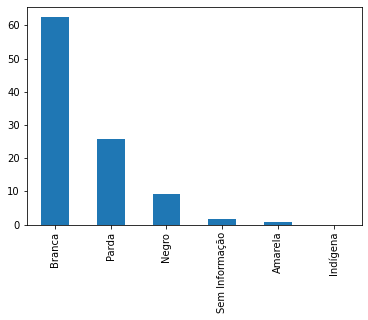

In [74]:
dis_freq_qualitativas_cor['Porcentual'].plot(kind='bar');

In [ ]:
#analisando quantidade registro por sexo

In [50]:
freq_sexo = df['IE_SEXO'].value_counts()

In [51]:
porcentual_sexo = df['IE_SEXO'].value_counts(normalize=True) * 100

In [54]:
dist_freq_qualitativa_sexo = pd.DataFrame({'Frequência': freq_sexo, 'Porcentual': porcentual_sexo})

In [59]:
dist_freq_qualitativa_sexo.rename(index = {'M': 'Masculino', 'F': 'Feminino', 'I': 'Não informado'}, inplace=True)

In [62]:
dist_freq_qualitativa_sexo.rename_axis('Sexo', axis='columns', inplace=True)

In [63]:
dist_freq_qualitativa_sexo

Sexo,Frequência,Porcentual
Feminino,539436,61.862281
Masculino,332548,38.136457
Não informado,11,0.001261


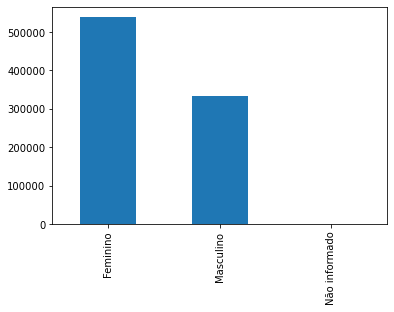

In [73]:
dist_freq_qualitativa_sexo['Frequência'].plot(kind='bar');

In [ ]:
#criando crosstable entre sexo e cor

In [82]:
sexo = {'F': 'Feminino',
        'I': 'Não informado',
        'M': 'Masculino'
        }

cor_pele = {1: 'Branca',
            2: 'Negro',
            3: 'Amarela',
            4: 'Indígena',
            5: 'Ignorado',
            11: 'Parda',
            12: 'Sem Informação'
            }

In [83]:
frequencia_cor_sexo = pd.crosstab(df['IE_SEXO'], df['NR_SEQ_COR_PELE'])

frequencia_cor_sexo.rename(index = sexo, inplace = True)
frequencia_cor_sexo.rename(columns = cor_pele, inplace = True)

In [84]:
frequencia_cor_sexo

NR_SEQ_COR_PELE,Branca,Negro,Amarela,Indígena,Parda,Sem Informação
IE_SEXO,,,,,,
Feminino,240495,33481,3536,20,102504,6587
Não informado,11,0,0,0,0,0
Masculino,159628,25600,2283,52,62975,4417


# Analise gráfica dos dados

In [ ]:
#verificando o mês com mais visitas

<AxesSubplot:xlabel='DS_MES', ylabel='Count'>

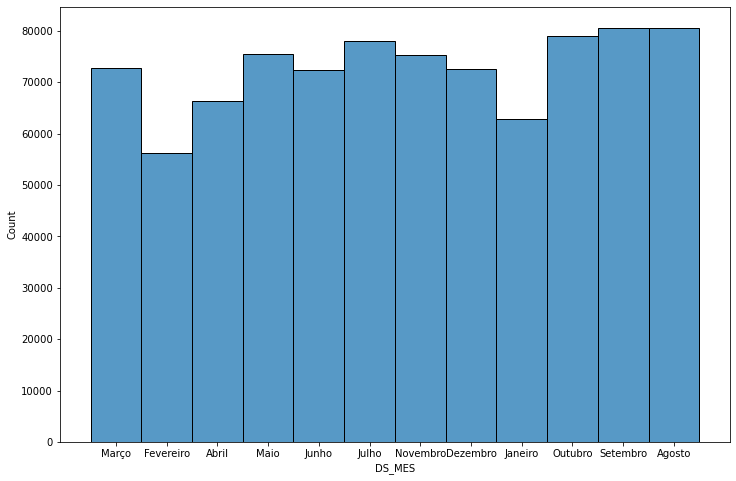

In [262]:
plt.subplots(figsize=(12, 8))

sns.histplot(data=df, x='DS_MES')

In [177]:
#filtrando somente os registros de Agosto
acesso_mes_agosto = df[(df['DS_MES'] == 'Agosto')]

In [205]:
quant_acesso_ds = acesso_mes_agosto.groupby('DS_DIA_SEMANA').count()['TP_ATENDIMENTO']

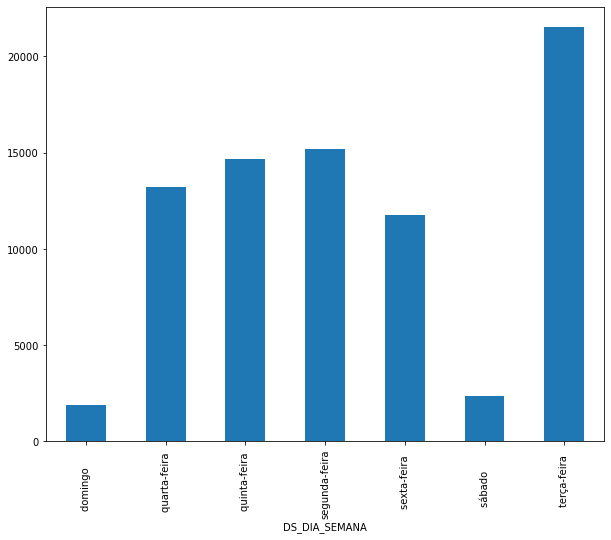

In [260]:
#quantidade de acesso por dias da semana, do mês com maior quantidade de acesso
plt.subplots(figsize=(10, 8))

quant_acesso_ds.plot(kind='bar');

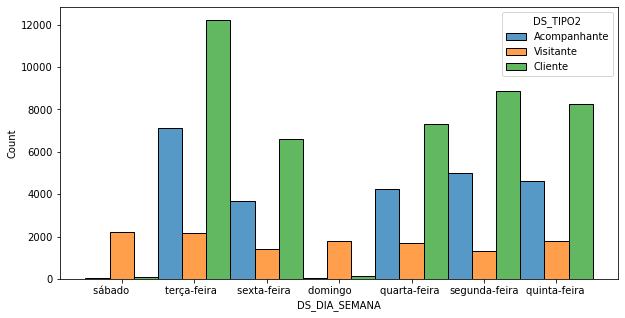

In [252]:
#quantidade de visitas no dia da semana por tipo
plt.subplots(figsize=(10, 5))

sns.histplot(data=acesso_mes_agosto, x='DS_DIA_SEMANA', hue='DS_TIPO2', multiple="dodge");

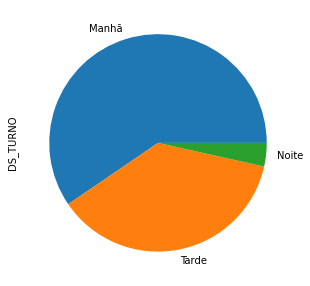

In [267]:
#proporção de visitas por turno
plt.subplots(figsize=(10, 5))

df['DS_TURNO'].value_counts().plot(kind='pie');